# Contents

* [Introduction](#section-one)
* [Prepare Phase](#section-two)
  * [Formatting dataset](#section-two-one)
* [Analysis Phase](#section-three)
* [Visualisation](#section-four)
  * [Visualisation 1](#section-four-one)
  * [Visualisation 2](#section-four-two)
  * [Visualisation 3](#section-four-three)
  * [Visualisation 4](#section-four-four)
* [Key Takeaways](#section-five)  
  

In [3]:
<a id="section-one"></a>
# Introduction
**About the Company**
Bellabeat, a high-tech manufacturer of health-focused products for women. Bellabeat is a successful small company, but they have the potential to become a larger player in the global smart device market. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company.
**Key Stakeholders**
* Urška Sršen: Bellabeat’s co-founder and Chief Creative Officer.
* Sando Mur: Mathematician and Bellabeat’s co-founder.
* Bellabeat marketing analytics team.

**Business Task**
Analyse the daily usage data of how consumers use non-bellabeat smart devices.Then use those insights to make high level recommendations for how these trends can inform Bellabeat marketing strategy.




ERROR: Error in parse(text = x, srcfile = src): <text>:1:1: unexpected '<'
1: <
    ^


<a id="section-two"></a>
# Preparing Dataset
The data used in this case study is public, therefore, everyone can access it. In addition, it is provided by FitBit Fitness Tracker, a well known entity. Due to these reasons, we can conclude the data is credible.

If you want to download it, [click here.](https://www.kaggle.com/arashnic/fitbit)

To start, let’s set up the environment by downloading and opening the necessary libraries for the analysis.

In [4]:
library(tidyverse)
library(ggplot2)
library(lubridate)
library(dplyr)
library(tidyr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




**Importing Datasets**

In [5]:
activity <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
intensities <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
hourlysteps <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")
sleep <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")

**Preview of our Dataset**

In [6]:
head(activity)
head(intensities)
head(hourlysteps)
head(sleep)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


,Id,ActivityHour,TotalIntensity,AverageIntensity
,<dbl>,<chr>,<int>,<dbl>
1,1503960366,4/12/2016 12:00:00 AM,20,0.333333
2,1503960366,4/12/2016 1:00:00 AM,8,0.133333
3,1503960366,4/12/2016 2:00:00 AM,7,0.116667
4,1503960366,4/12/2016 3:00:00 AM,0,0.000000
5,1503960366,4/12/2016 4:00:00 AM,0,0.000000
6,1503960366,4/12/2016 5:00:00 AM,0,0.000000


,Id,ActivityHour,StepTotal
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016 12:00:00 AM,373
2,1503960366,4/12/2016 1:00:00 AM,160
3,1503960366,4/12/2016 2:00:00 AM,151
4,1503960366,4/12/2016 3:00:00 AM,0
5,1503960366,4/12/2016 4:00:00 AM,0
6,1503960366,4/12/2016 5:00:00 AM,0


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


<a id="section-two-one"></a>
**Formatting the Dataset**

In [7]:
#intensities
intensities$ActivityHour = as.POSIXct(intensities$ActivityHour, format= "%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
 intensities$time <- format(intensities$ActivityHour, format = "%H:%M:%S")
 intensities$date <- format(intensities$ActivityHour, format = "%m/%d/%y")
#hourlysteps
hourlysteps$ActivityHour= as.POSIXct(hourlysteps$ActivityHour, format= "%m/%d/%Y %I:%M:%S %p", tz= Sys.timezone())
 hourlysteps$time <- format(hourlysteps$ActivityHour, format = "%H:%M:%S")
 hourlysteps$date <- format(hourlysteps$ActivityHour, format = "%m/%d/%y")
#sleep
sleep$SleepDay = as.POSIXct(sleep$SleepDay, format = "%m/%d/%Y %I:%M:%S %p", tz = Sys.timezone())
  sleep$time <- format(sleep$SleepDay, format = "%H:%M:%S")
  sleep$date <- format(sleep$SleepDay, format = "%m/%d/%y")

<a id="section-three"></a>
# Analysing The Dataset

In [8]:
#activity
active_min <- activity %>% select(Id, VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes)
head(active_min)
active_min_tall <- active_min %>% gather(key = active, value = minutes, VeryActiveMinutes:SedentaryMinutes)
#intensities
int_new <- intensities %>%
   group_by(time) %>%
   drop_na() %>%
   summarise(mean_total_int = mean(TotalIntensity))
#hourlysteps
step_new<- hourlysteps %>% group_by(time) %>% drop_na() %>% summarise(mean_total_steps = mean(StepTotal))
#sleep
sleep_new <- sleep %>% mutate(hourslept = TotalMinutesAsleep/60)
  sleep_new2<- sleep_new %>% group_by(date) %>% drop_na() %>% summarise(mean_hourslept = mean(hourslept))
  sleep_id<- sleep_new %>% group_by(Id) %>% drop_na() %>% summarise(mean_hourslept = mean(hourslept))

,Id,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes
,<dbl>,<int>,<int>,<int>,<int>
1,1503960366,25,13,328,728
2,1503960366,21,19,217,776
3,1503960366,30,11,181,1218
4,1503960366,29,34,209,726
5,1503960366,36,10,221,773
6,1503960366,38,20,164,539


<a id="section-four"></a>
# Visualisation

First, let's look into how much time a user usually spends on sedantary or active role.
<a id="section-four-one"></a>

       Id            VeryActiveMinutes FairlyActiveMinutes LightlyActiveMinutes
 Min.   :1.504e+09   Min.   :  0.00    Min.   :  0.00      Min.   :  0.0       
 1st Qu.:2.320e+09   1st Qu.:  0.00    1st Qu.:  0.00      1st Qu.:127.0       
 Median :4.445e+09   Median :  4.00    Median :  6.00      Median :199.0       
 Mean   :4.855e+09   Mean   : 21.16    Mean   : 13.56      Mean   :192.8       
 3rd Qu.:6.962e+09   3rd Qu.: 32.00    3rd Qu.: 19.00      3rd Qu.:264.0       
 Max.   :8.878e+09   Max.   :210.00    Max.   :143.00      Max.   :518.0       
 SedentaryMinutes
 Min.   :   0.0  
 1st Qu.: 729.8  
 Median :1057.5  
 Mean   : 991.2  
 3rd Qu.:1229.5  
 Max.   :1440.0  

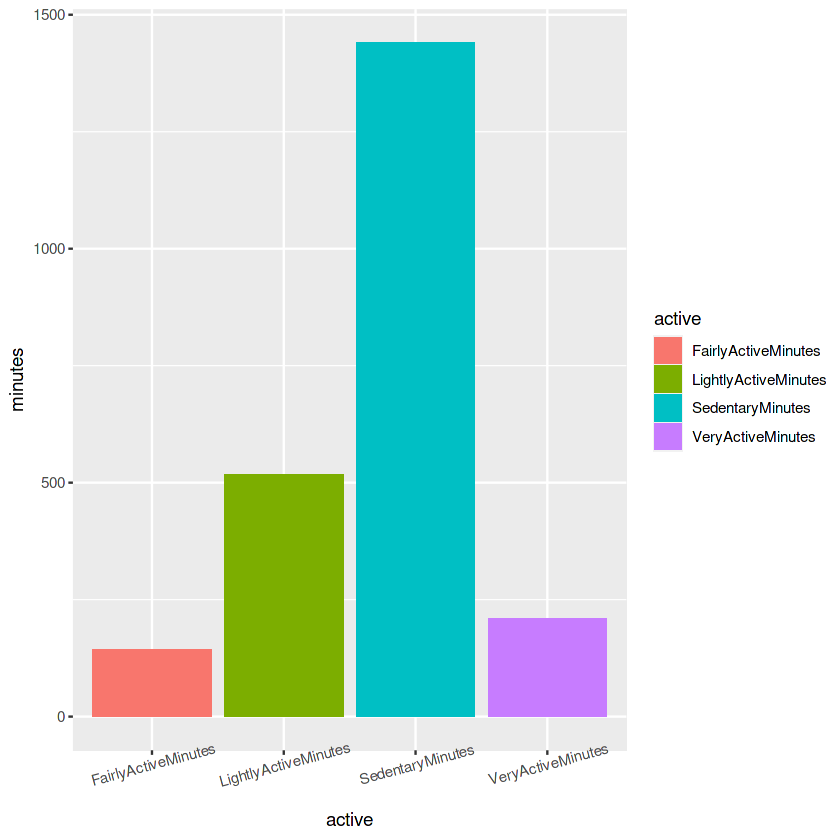

In [9]:
#activity
summary(active_min)
ggplot(active_min_tall, aes(active, minutes, fill= active)) +
  geom_col(position = "dodge")+
  theme(axis.text.x = element_text(angle = 15))

* Here we can see that user spends most of their time is Sedentary mode.
* A User spend on average 16 hours in Sedentary, which is **higher** than normal standards.
* Other than Sedentary users mostly do **Lightactive** steps(3 hour 20min on average).

Now, Let's see the relationship between Total Steps and Calories burned.
<a id="section-four-two"></a>

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



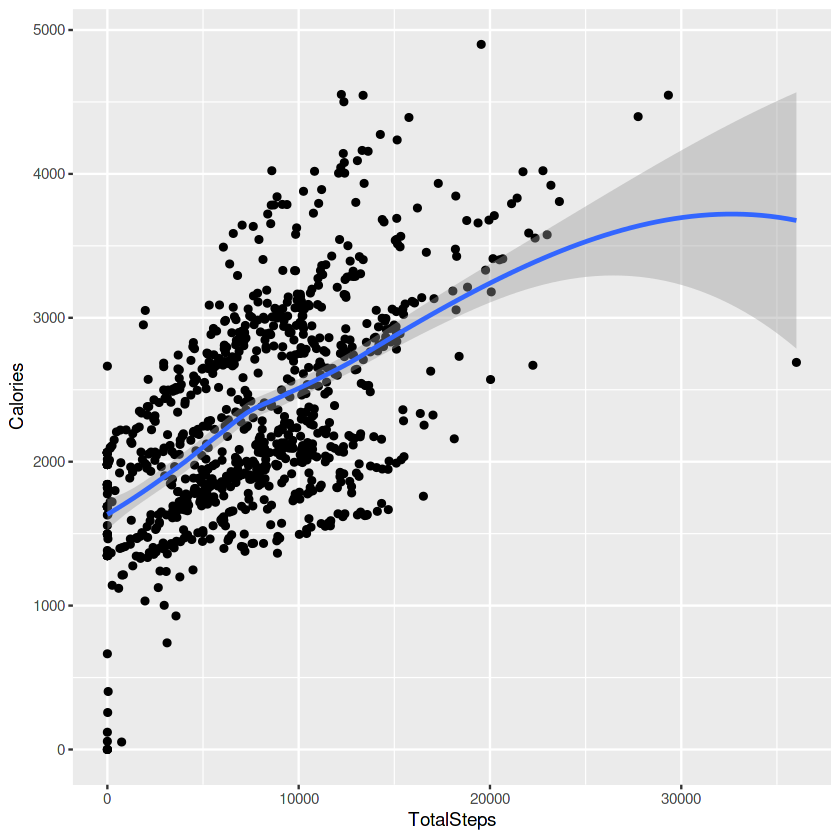

In [10]:

ggplot(activity, aes(x= TotalSteps, y= Calories))+ 
  geom_point()+ geom_smooth()

I see positive correlation here between Total Steps and Calories, which is obvious - the more active we are, the more calories we burn.

Now, let's find out at what time of the day users are **most active** and burn the most calories.
<a id="section-four-three"></a>

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


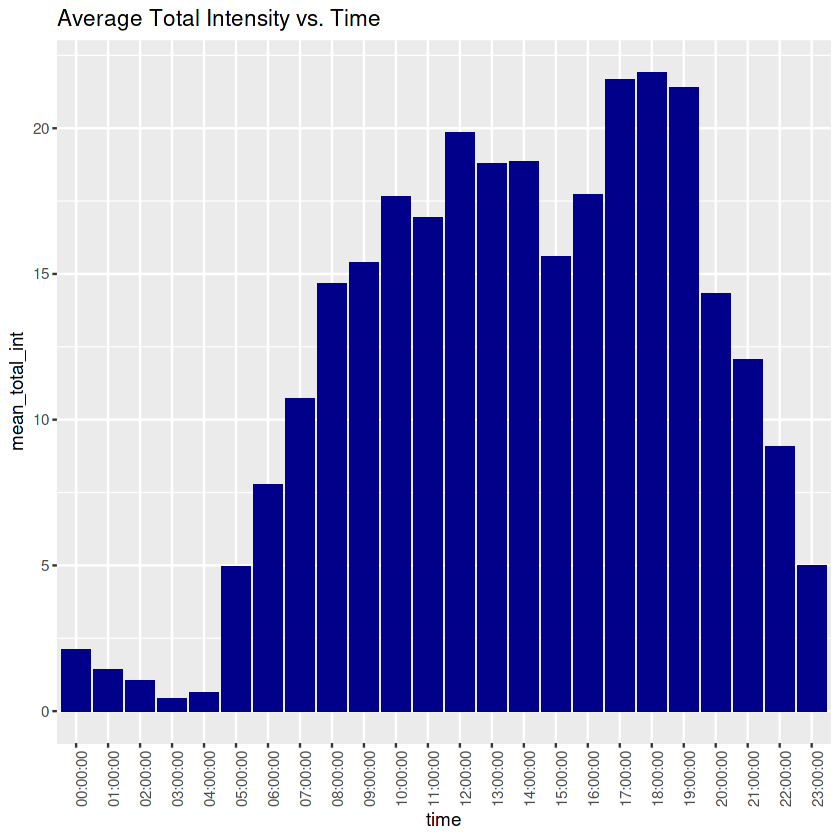

In [11]:

#intensities
ggplot(data=int_new, aes(x=time, y=mean_total_int)) + geom_histogram(stat = "identity", fill='darkblue') +
      theme(axis.text.x = element_text(angle = 90)) +
      labs(title="Average Total Intensity vs. Time")

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


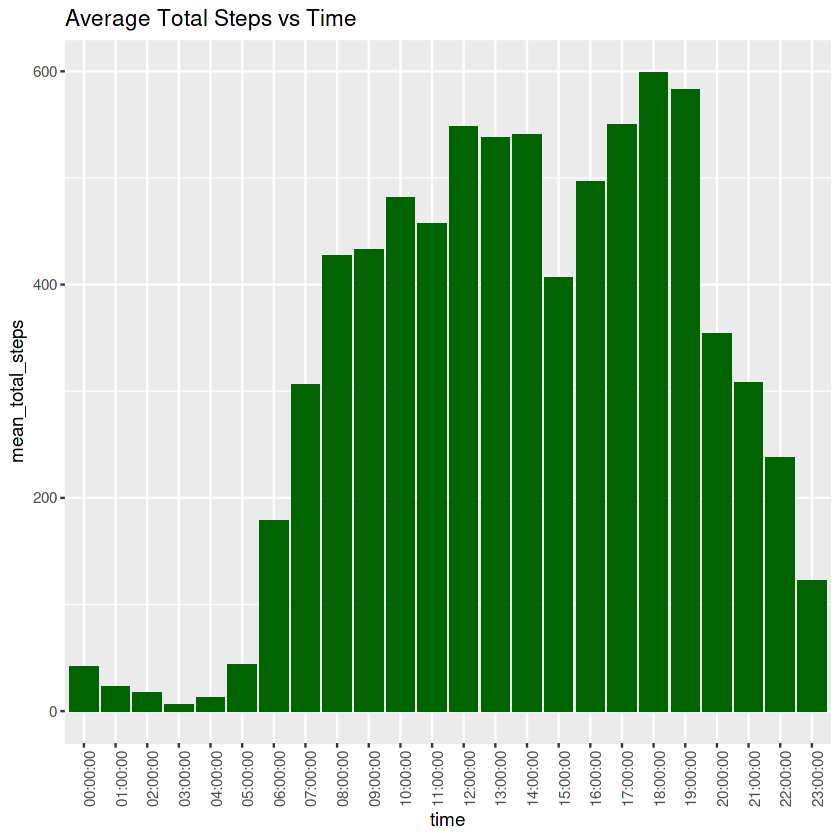

In [12]:
#hourlysteps
ggplot(data = step_new, aes(x= time, y= mean_total_steps))+ 
  geom_histogram(stat = "identity", fill= 'darkgreen')+ 
  theme(axis.text.x = element_text(angle = 90))+
 labs(title = "Average Total Steps vs Time")

After visualising hourlySteps and houlyIntensities, I found out that users are **most active at 12 noon to 2pm and 5pm to 7pm**.
* We can use this data in the Bellabeat app to remind and motivate users to go for a run or walk. We can also give them information about their previous run and calories burned.

Now, let's look on how much sleep on average a user take in a day.
<a id="section-four-four"></a>

In [13]:

#sleep
summary(sleep_id$mean_hourslept)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.017   5.605   6.985   6.294   7.488  10.867 

In [14]:
#Standard Diviation = 
sd(sleep_id$mean_hourslept)

[1] 2.279401

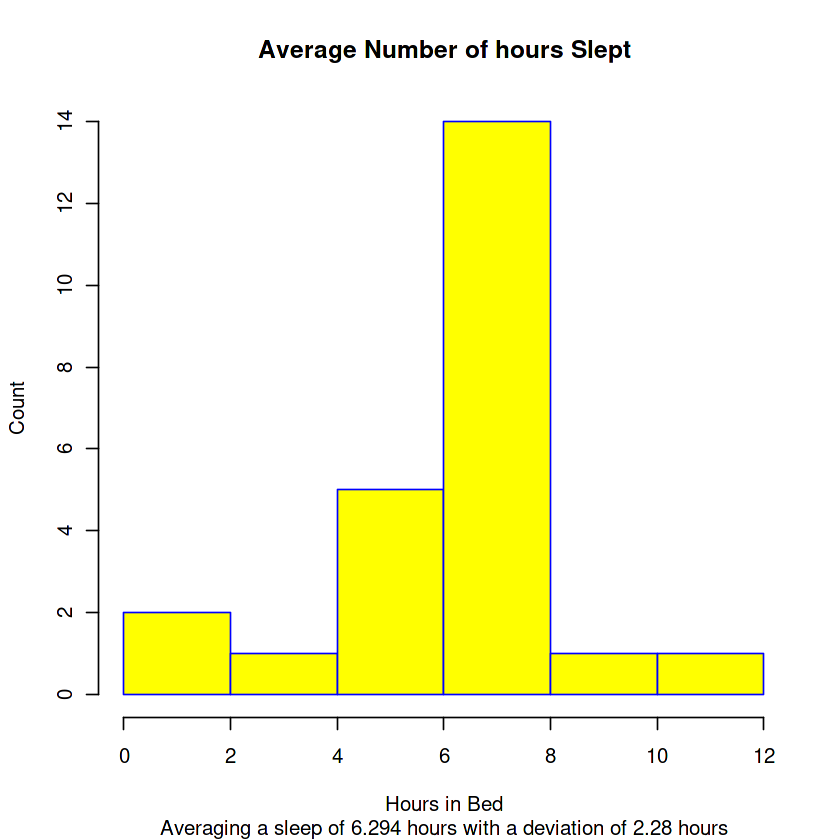

In [15]:
 hist(sleep_id$mean_hourslept, main = "Average Number of hours Slept", sub = "Averaging a sleep of 6.294 hours with a deviation of 2.28 hours", xlab = "Hours in Bed", ylab = "Count", border = "blue", col = "yellow", xlim = c(0,12))

As we can see on average a user has 6hours 30min of sleep per day.
With a Diviation of 2.28.
* We can say that the user are not sleeping up to the recommended 7 to 8 hours of sleep.

<a id="section-five"></a>
# Key Takeaways
* Calories are burnt by the steps taken daily. Based on users’ objectives, Bellabeat could recommend a minimum number of steps for users to take to encorage them to achieve their goals.

* In order to create a habit of exercising every day, Bellabeat could send a notification at a specific time when they are most active for the user to remain consistent throughout the week.

* From the above analysis we find that users are not sleeping the recommended 7-8 hours, and according to [Sleep Foundation](https://www.sleepfoundation.org/women-sleep) article about Women and Sleep, It tells that Women are more likely to have sleep problems than men. Therefore, Bellabeat app should provide deep analysis of the users sleep cycle and give appropiate recommendation to improve the sleep cycle.

* Bellabeat can also show data about the users activity period and how much time they are sedentary.

**Thankyou for showing interest in my case study!**

This is my first project using R. I would appreciate any comments and recommendations for improvement!